# Demo for 2 DoF models

The aim of this demo code is to compare the resolts form sloving the equation of motion with the data from the simulations. This code uses only 1 dataset, therefore the results can't be used for the learning part.

In [22]:
import sys
import os

import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
import equation_solver_2DoF as solv
import lmfit_2dof
base_path =  os.path.dirname( os.path.dirname( os.path.abspath('') ))
function_path = os.path.join(base_path, 'function_files')
function_path = r'C:\Users\emmaf\Documents\7. félév\SZAKDOLGOZAT\osd_dummy_modeling_2\osd_dummy_modeling\function_files'
sys.path.append(function_path)
print(function_path)
import krc_reader
import filterSAEJ211
import data_saver as data

sp.init_printing()
from sympy import symbols




C:\Users\emmaf\Documents\7. félév\SZAKDOLGOZAT\osd_dummy_modeling_2\osd_dummy_modeling\function_files


In [23]:
# path_EU = os.path.join( os.path.dirname( os.path.abspath('') ), 'Dataset', 'EU2' )
# path_US = os.path.join( os.path.dirname( os.path.abspath('') ), 'Dataset', 'US' )
# base_path = os.path.join( os.path.dirname( os.path.abspath('') ), 'Dataset')
base_path = r'C:\Users\emmaf\Documents\7. félév\SZAKDOLGOZAT\osd_dummy_modeling_2\osd_dummy_modeling\Dataset'
# path_EU = os.path.join( os.path.abspath(''), 'Dataset', 'EU2' )
path_EU = os.path.join(base_path, 'EU2')
path_US = os.path.join(base_path, 'US')
# path_US = os.path.join( os.path.abspath(''), 'Dataset', 'US' )

# sim_repl_lib_paths = [ path_US  ]
sim_repl_lib_paths = [ path_EU, path_US  ]

krc_data_reader = krc_reader.KeyResultCurveDataReader( sim_repl_lib_paths )
krc_data_reader.load_replications_results( moving_average_win_len=10 )
krc_data_reader.get_channels_with_missing_data()

[('EU2', 'SO000', '11CHST0000H3DSX0'),
 ('EU2', 'SO001', '11CHST0000H3DSX0'),
 ('EU2', 'SO002', '11CHST0000H3DSX0'),
 ('EU2', 'SO003', '11CHST0000H3DSX0'),
 ('EU2', 'SO004', '11CHST0000H3DSX0'),
 ('EU2', 'SO005', '11CHST0000H3DSX0'),
 ('EU2', 'SO006', '11CHST0000H3DSX0'),
 ('EU2', 'SO007', '11CHST0000H3DSX0'),
 ('EU2', 'SO008', '11CHST0000H3DSX0'),
 ('EU2', 'SO009', '11CHST0000H3DSX0'),
 ('EU2', 'SO010', '11CHST0000H3DSX0'),
 ('EU2', 'SO011', '11CHST0000H3DSX0'),
 ('EU2', 'SO012', '11CHST0000H3DSX0'),
 ('EU2', 'SO013', '11CHST0000H3DSX0'),
 ('EU2', 'SO014', '11CHST0000H3DSX0'),
 ('EU2', 'SO015', '11CHST0000H3DSX0'),
 ('EU2', 'SO016', '11CHST0000H3DSX0'),
 ('EU2', 'SO017', '11CHST0000H3DSX0'),
 ('EU2', 'SO018', '11CHST0000H3DSX0'),
 ('EU2', 'SO019', '11CHST0000H3DSX0'),
 ('EU2', 'SO020', '11CHST0000H3DSX0'),
 ('EU2', 'SO021', '11CHST0000H3DSX0'),
 ('EU2', 'SO022', '11CHST0000H3DSX0'),
 ('EU2', 'SO023', '11CHST0000H3DSX0'),
 ('EU2', 'SO024', '11CHST0000H3DSX0'),
 ('EU2', 'SO025', '11CHST

In [24]:
krc_data_reader.remove_channels_from_all_replications( [ '11CHST0000H3DSX0' ] )
krc_data_reader.get_channels_with_missing_data()

[('EU2', 'SO095', '10SLEDFRMI00ACX0'),
 ('EU2', 'SO095', '11CHST0000H3ACX0'),
 ('EU2', 'SO095', '11CHST0000H3ACY0'),
 ('EU2', 'SO095', '11CHST0000H3ACZ0'),
 ('EU2', 'SO095', '11FEMRLE00H3FOX0'),
 ('EU2', 'SO095', '11FEMRLE00H3FOY0'),
 ('EU2', 'SO095', '11FEMRLE00H3FOZ0'),
 ('EU2', 'SO095', '11FEMRRI00H3FOX0'),
 ('EU2', 'SO095', '11FEMRRI00H3FOY0'),
 ('EU2', 'SO095', '11FEMRRI00H3FOZ0'),
 ('EU2', 'SO095', '11HEAD0000H3ACX0'),
 ('EU2', 'SO095', '11HEAD0000H3ACY0'),
 ('EU2', 'SO095', '11HEAD0000H3ACZ0'),
 ('EU2', 'SO095', '11LUSP0000H3FOX0'),
 ('EU2', 'SO095', '11LUSP0000H3FOY0'),
 ('EU2', 'SO095', '11LUSP0000H3FOZ0'),
 ('EU2', 'SO095', '11LUSP0000H3MOX0'),
 ('EU2', 'SO095', '11LUSP0000H3MOY0'),
 ('EU2', 'SO095', '11LUSP0000H3MOZ0'),
 ('EU2', 'SO095', '11NECKUP00H3FOX0'),
 ('EU2', 'SO095', '11NECKUP00H3FOY0'),
 ('EU2', 'SO095', '11NECKUP00H3FOZ0'),
 ('EU2', 'SO095', '11NECKUP00H3MOX0'),
 ('EU2', 'SO095', '11NECKUP00H3MOY0'),
 ('EU2', 'SO095', '11NECKUP00H3MOZ0'),
 ('EU2', 'SO095', '11PELV

In [25]:
krc_data_reader.remove_replications( [ ('US', 'SO000'), ('US', 'SO019'), ('US', 'SO095'), ('EU2', 'SO095') ] ) #('US', 'SO024'), ('US', 'SO056'),
krc_data_reader.get_channels_with_missing_data()

In [26]:
channels_in_data = krc_data_reader.get_available_channels()
print( channels_in_data )

{'11FEMRRI00H3FOY0', '11LUSP0000H3MOZ0', '11LUSP0000H3MOX0', '11PELV0000H3ACZ0', '11LUSP0000H3FOX0', '11SEBE0000B6FOR0', '11PELV0000H3ACX0', '11SEBE0000B3FOR0', '11NECKUP00H3FOX0', '11FEMRRI00H3FOX0', '11FEMRRI00H3FOZ0', '11SEBE0000B5FOR0', '11LUSP0000H3FOY0', '11CHST0000H3ACZ0', '11NECKUP00H3FOY0', '10SLEDFRMI00ACX0', '11FEMRLE00H3FOY0', '11NECKUP00H3FOZ0', '11CHST0000H3ACY0', '11HEAD0000H3ACZ0', '11NECKUP00H3MOX0', '11FEMRLE00H3FOX0', '11LUSP0000H3FOZ0', '11CHST0000H3ACX0', '11LUSP0000H3MOY0', '11NECKUP00H3MOY0', '11PELV0000H3ACY0', '11NECKUP00H3MOZ0', '11SEBE0000B4FOR0', '11FEMRLE00H3FOZ0', '11HEAD0000H3ACX0', '11HEAD0000H3ACY0'}


In [27]:
krc_data_reader.get_available_replications()

[('EU2', 'SO000'),
 ('EU2', 'SO001'),
 ('US', 'SO001'),
 ('EU2', 'SO002'),
 ('US', 'SO002'),
 ('EU2', 'SO003'),
 ('US', 'SO003'),
 ('EU2', 'SO004'),
 ('US', 'SO004'),
 ('EU2', 'SO005'),
 ('US', 'SO005'),
 ('EU2', 'SO006'),
 ('US', 'SO006'),
 ('EU2', 'SO007'),
 ('US', 'SO007'),
 ('EU2', 'SO008'),
 ('US', 'SO008'),
 ('EU2', 'SO009'),
 ('US', 'SO009'),
 ('EU2', 'SO010'),
 ('US', 'SO010'),
 ('EU2', 'SO011'),
 ('US', 'SO011'),
 ('EU2', 'SO012'),
 ('US', 'SO012'),
 ('EU2', 'SO013'),
 ('US', 'SO013'),
 ('EU2', 'SO014'),
 ('US', 'SO014'),
 ('EU2', 'SO015'),
 ('US', 'SO015'),
 ('EU2', 'SO016'),
 ('US', 'SO016'),
 ('EU2', 'SO017'),
 ('US', 'SO017'),
 ('EU2', 'SO018'),
 ('US', 'SO018'),
 ('EU2', 'SO019'),
 ('EU2', 'SO020'),
 ('US', 'SO020'),
 ('EU2', 'SO021'),
 ('US', 'SO021'),
 ('EU2', 'SO022'),
 ('US', 'SO022'),
 ('EU2', 'SO023'),
 ('US', 'SO023'),
 ('EU2', 'SO024'),
 ('US', 'SO024'),
 ('EU2', 'SO025'),
 ('US', 'SO025'),
 ('EU2', 'SO026'),
 ('US', 'SO026'),
 ('EU2', 'SO027'),
 ('US', 'SO027'),


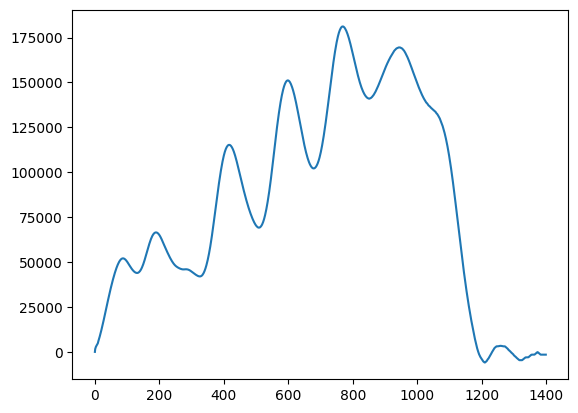

In [28]:
sing_rep_res = krc_data_reader.get_single_replication_results( ('EU2', 'SO066') )
plt.plot( sing_rep_res['10SLEDFRMI00ACX0'] )

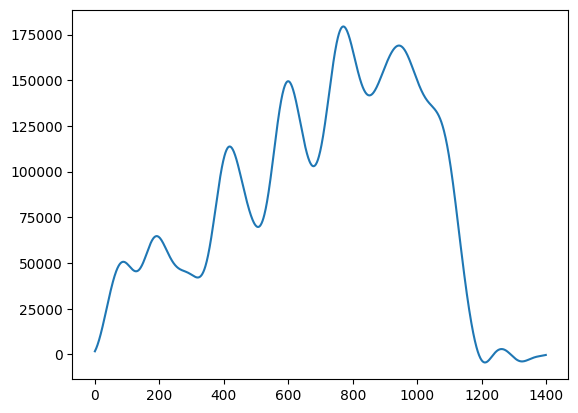

In [29]:
# Filter
data = sing_rep_res['10SLEDFRMI00ACX0']
# data = data
filtered_data = filterSAEJ211.filterSAEJ211(data, 6, 0.001)
# time = np.linspace(0, 0.00014, 1400)
plt.plot(filtered_data)

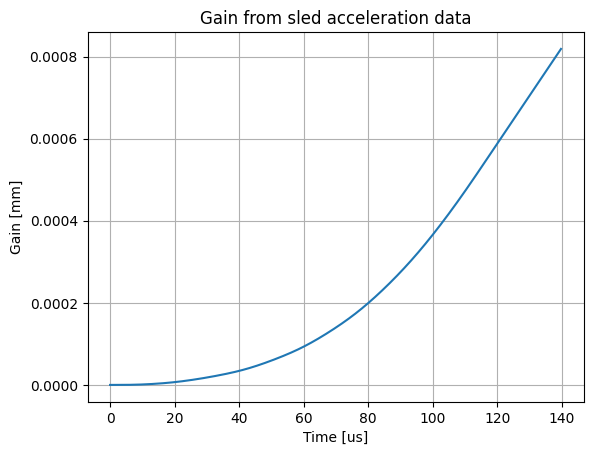

In [30]:
# Given acceleration
acceleration_data = np.array(filtered_data) # mm/s^2
sled_acceleration_data = acceleration_data/10**12 # mm/us^2
time = np.linspace(0, 0.00014*10**6, 1400) # microsec
# Initial conditions
x_0 = 0
v_0 =0
y0 = [x_0, v_0]
max_step = 0.0000001*10**6
# Sled displacement
gain, t_values = solv.sled_acceleration_to_displacement(sled_acceleration_data, time, y0, max_step)
    
# Plotting the results
plt.figure()
plt.plot(t_values, gain)
plt.xlabel('Time [us]')
plt.ylabel('Gain [mm]')
plt.title("Gain from sled acceleration data")
plt.grid() # kikapcsolható
plt.show()

Gain is in mm t_vales is in microsec.

Solution of differential equation: {Derivative(phi(t), (t, 2)): 6.0*k*l*x(t)*cos(phi(t))/(3.0*l**2*m*cos(phi(t))**2 - 4.0*l**2*m) - 6.0*k*r(t)*cos(phi(t))/(3.0*l*m*cos(phi(t))**2 - 4.0*l*m) + 12.0*k_t*phi(t)/(3.0*l**2*m*cos(phi(t))**2 - 4.0*l**2*m) + 3.0*l**2*m*sin(phi(t))*cos(phi(t))*Derivative(phi(t), t)**2/(3.0*l**2*m*cos(phi(t))**2 - 4.0*l**2*m), Derivative(x(t), (t, 2)): 4.0*k*l*x(t)/(3.0*l*m*cos(phi(t))**2 - 4.0*l*m) - 4.0*k*r(t)/(3.0*m*cos(phi(t))**2 - 4.0*m) + 6.0*k_t*phi(t)*cos(phi(t))/(3.0*l*m*cos(phi(t))**2 - 4.0*l*m) + 2.0*l**2*m*sin(phi(t))*Derivative(phi(t), t)**2/(3.0*l*m*cos(phi(t))**2 - 4.0*l*m)}
ddx_num_expr: 4.12*k*x(t)/(240.093*cos(phi(t))**2 - 320.124) - 4.0*k*r(t)/(233.1*cos(phi(t))**2 - 310.8) + 6.0*k_t*phi(t)*cos(phi(t))/(240.093*cos(phi(t))**2 - 320.124) + 164.86386*sin(phi(t))*Derivative(phi(t), t)**2/(240.093*cos(phi(t))**2 - 320.124)


<function _lambdifygenerated(t, _Dummy_106, _Dummy_104, _Dummy_108, _Dummy_105, _Dummy_107, k, k_t)>

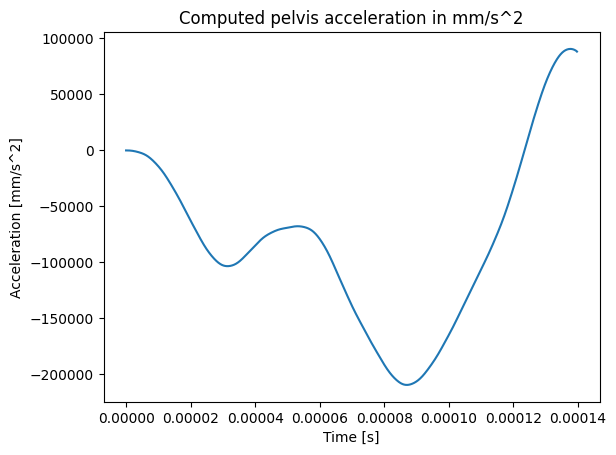

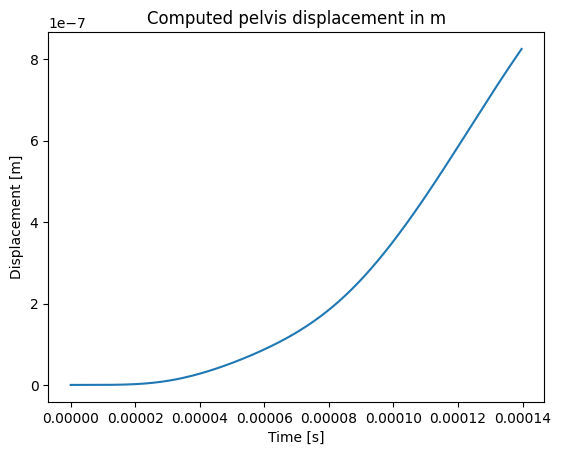

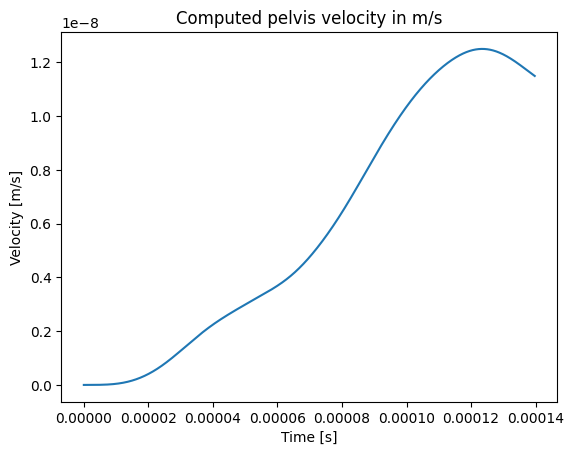

In [31]:
# Define constants
m, l =symbols("m l")
data = [(m, 77.7), (l, 1.03)] 
gain = gain*10**-3 # mm to m
# Solving second order Lagrange
# ddx_num = solv.symbolic_solver(data[0], data[1], data[2], data[3], data[4])
ddx_num, ddphi_num = solv.symbolic_solver(77.7, 1.03)
display(ddx_num)
y0 = [0,0,0,0]
max_step = 0.0000001*10**6
k_values = 1 # needs to be optimized later
k_t_values = 10 # needs to be optimized later
x_computed, dx_computed, phi_computed, dphi_computed, t_computed = solv.num_solver(ddx_num, ddphi_num, gain, t_values, y0, max_step, k_values, k_t_values)
acceleration_computed, angular_acceleration_computed = solv.acceleration_substituted(ddx_num, ddphi_num, gain, t_computed, y0, max_step, k_values, k_t_values)  #m/microsec^2
acceleration_computed = -acceleration_computed*10**15  # mm/s^2
time_SI = t_computed/10**6


plt.figure()
plt.plot(time_SI, acceleration_computed)
plt.xlabel('Time [s]')
plt.ylabel('Acceleration [mm/s^2]')
plt.title("Computed pelvis acceleration in mm/s^2")
# plt.grid() # kikapcsolható
plt.show()

plt.figure()
plt.plot(time_SI, x_computed)
plt.xlabel('Time [s]')
plt.ylabel('Displacement [m]')
plt.title("Computed pelvis displacement in m")
# plt.grid() # kikapcsolható
plt.show()

plt.figure()
plt.plot(time_SI, dx_computed)
plt.xlabel('Time [s]')
plt.ylabel('Velocity [m/s]')
plt.title("Computed pelvis velocity in m/s")
# plt.grid() # kikapcsolható
plt.show()




Derivative(x(t), (t, 2)): 4.0*k*l*x(t)/(3.0*l*m*cos(phi(t))**2 - 4.0*l*m) - 4.0*k*r(t)/(3.0*m*cos(phi(t))**2 - 4.0*m) + 6.0*k_t*phi(t)*cos(phi(t))/(3.0*l*m*cos(phi(t))**2 - 4.0*l*m) + 2.0*l**2*m*sin(phi(t))*Derivative(phi(t), t)**2/(3.0*l*m*cos(phi(t))**2 - 4.0*l*m)

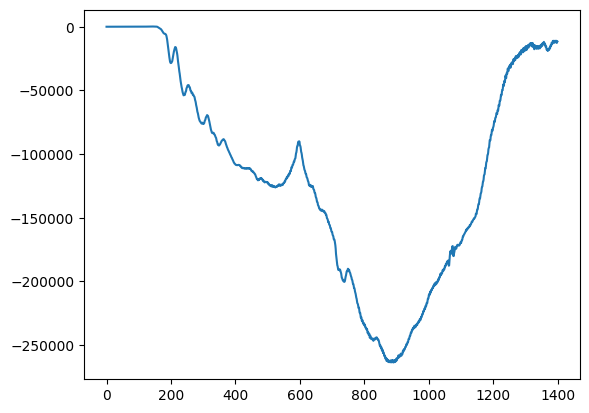

In [32]:
sing_rep_res = krc_data_reader.get_single_replication_results( ('EU2', 'SO006') )
plt.plot( sing_rep_res['11PELV0000H3ACX0'] )

Text(0.5, 1.0, 'Pelvis acceleration from dataset [mm/s]')

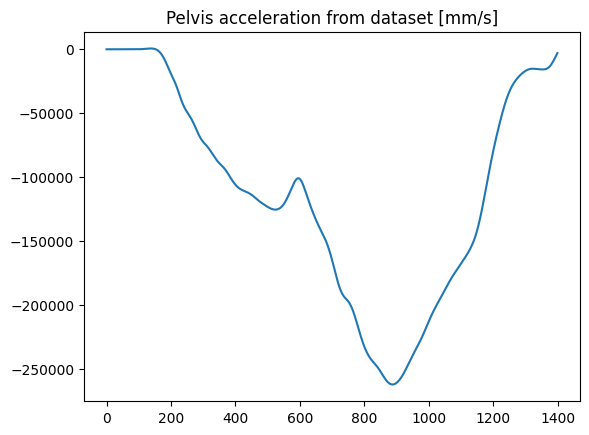

In [33]:
# Filtering
data = sing_rep_res['11PELV0000H3ACX0']
# data = data
filtered_data = filterSAEJ211.filterSAEJ211(data, 6, 0.001)
plt.plot(filtered_data)
plt.title("Pelvis acceleration from dataset [mm/s]")

Text(0.5, 1.0, 'Comparison of simulated and computed results')

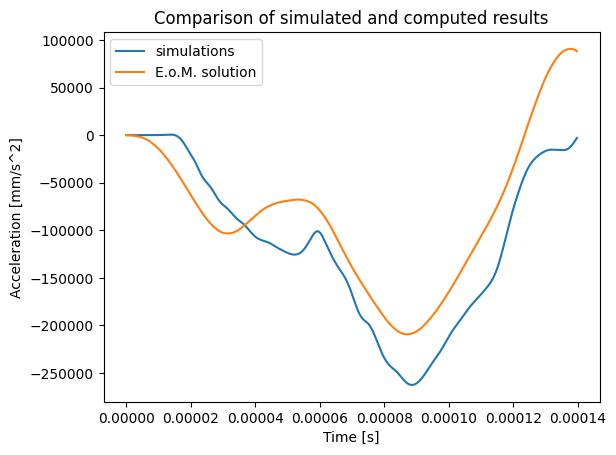

In [34]:
plt.figure()
plt.plot(time_SI, filtered_data, label ='simulations')
plt.plot(time_SI, acceleration_computed, label = 'E.o.M. solution')
plt.legend()
plt.xlabel('Time [s]')
plt.ylabel('Acceleration [mm/s^2]')
plt.title("Comparison of simulated and computed results")

# Lmfit trial

ddx for k and ddphi for kt

We have
- r(t):  gain
- t:     t_values
- ddx_simu:    filtered_data
- x and dx used to compute ddx_num: x_computed, dx_computed  


In [35]:
import lmfit
from lmfit import Parameters, Minimizer, minimize


In [36]:
print(t_values)

[1.000000e-04 1.100000e-03 1.110000e-02 ... 1.395111e+02 1.396111e+02
 1.397111e+02]


Parameters([('k', <Parameter 'k', value=1, bounds=[0:inf]>), ('k_t', <Parameter 'k_t', value=10, bounds=[0:inf]>)])


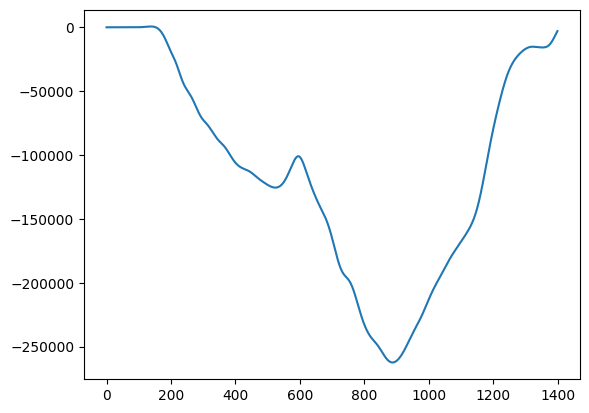

In [37]:
params=lmfit.Parameters()
# set up the initial parameter values
params.add('k', min =0, max = None, value=1, vary = True)    # N/m 
params.add('k_t', min =0, max = None, value=10, vary = True) # Nm/rad  
# params.add('m', value=77.7, vary=False)     #kg
print(params)
inital_guess = lmfit_2dof.pelvis_acceleration(x_computed, gain, phi_computed, dphi_computed, params)
pelvis_interp = lmfit_2dof.data_interpolated(filtered_data, t_computed)
pelvis_interp =pelvis_interp(t_computed)
plt.plot(pelvis_interp)

In [38]:
pelvis_obj_func = lmfit_2dof.obj_function
fitter = Minimizer(pelvis_obj_func, params, fcn_args=(x_computed,gain, phi_computed, dphi_computed, pelvis_interp))
result = fitter.minimize()
result.params.pretty_print()

Name     Value      Min      Max   Stderr     Vary     Expr Brute_Step
k       16.33        0      inf   0.5856     True     None     None
k_t     213.7        0      inf    7.767     True     None     None


Parameters([('k', <Parameter 'k', value=np.float64(16.328590210419712) +/- 0.586, bounds=[0:inf]>), ('k_t', <Parameter 'k_t', value=np.float64(213.7256629441931) +/- 7.77, bounds=[0:inf]>)])
[ 16.32859021 213.72566294]


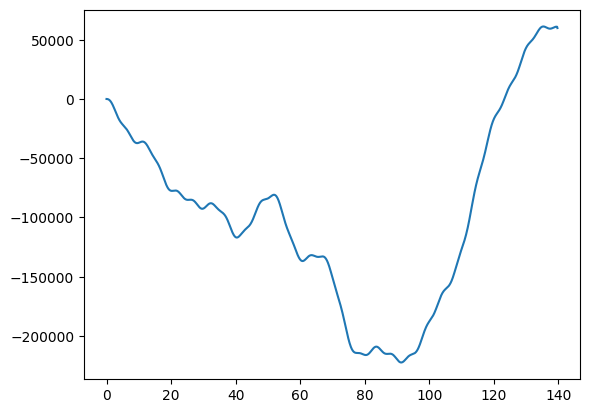

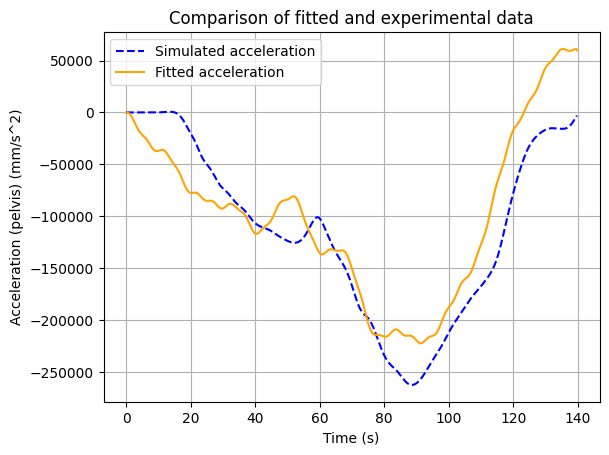

In [39]:
# fitter = Minimizer(eom_2dof, params, fcn_args=(x_computed,gain, filtered_data))
print(result.params)
optimal_params = np.array([result.params[param].value for param in result.params])
print(optimal_params)
k_opt = optimal_params[0]
k_t_opt = optimal_params[1]

pelvis_acceleration_fitted = lmfit_2dof.pelvis_acceleration_num(x_computed, gain, phi_computed, dphi_computed, k_opt, k_t_opt)

plt.figure()
plt.plot(t_values, pelvis_acceleration_fitted)

plt.figure()
plt.plot(t_values, pelvis_interp, label='Simulated acceleration', linestyle='--', color='blue')
plt.plot(t_values, pelvis_acceleration_fitted, label ='Fitted acceleration', linestyle='-',color='orange')
# plt.plot(t_values, acceleration_computed*10**6,label ='Fitted acceleration', linestyle='-',color='orange')
plt.title('Comparison of fitted and experimental data')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (pelvis) (mm/s^2)')
plt.legend()
plt.grid(True)




## Comparison of simulated, computed, and fitted pelvis accelerations

In [40]:

max_step = 0.0000001*10**6
x_computed_new, dx_computed_new, phi_computed_new, dphi_computed_new, t_computed_new = solv.num_solver(ddx_num, ddphi_num, gain, t_values, y0, max_step, k_opt, k_t_opt)
acceleration_computed_new, angular_acceleration_computed_new = solv.acceleration_substituted(ddx_num, ddphi_num, gain, t_values, y0, max_step, k_opt, k_t_opt)  #m/microsec^2
acceleration_computed_new = -acceleration_computed_new*10**15   # mm/s^2
filtered_result = filterSAEJ211.filterSAEJ211(pelvis_acceleration_fitted, 6, 0.001)
time_SI = t_computed_new/10**6


Text(0.5, 1.0, 'Comparison of results')

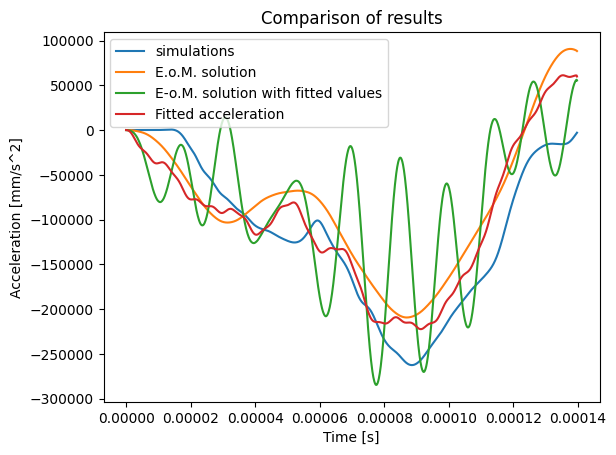

In [41]:
plt.figure()
plt.plot(time_SI, pelvis_interp, label ='simulations')
plt.plot(time_SI, acceleration_computed, label = 'E.o.M. solution')
plt.plot(time_SI, acceleration_computed_new, label = 'E-o.M. solution with fitted values')
plt.plot(time_SI, pelvis_acceleration_fitted,label ='Fitted acceleration')
# plt.plot(time_SI, filtered_result,label ='Filtered fitted acceleration')
plt.legend()
plt.xlabel('Time [s]')
plt.ylabel('Acceleration [mm/s^2]')
plt.title("Comparison of results")

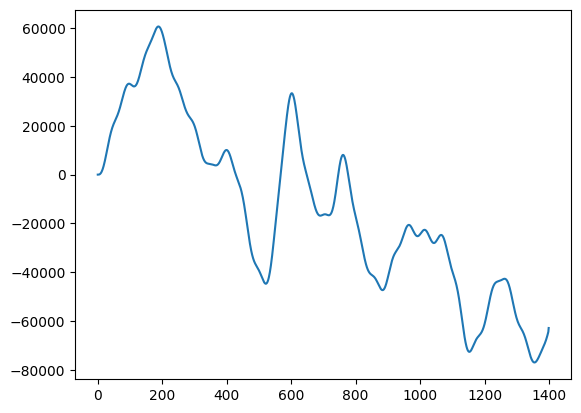

In [42]:
difference = solv.difference_calc(pelvis_interp, pelvis_acceleration_fitted)
plt.plot(difference)

## Adding chest and head acceleration data